In [5]:
import pandas as pd
data = pd.read_csv('/content/Healthcare Providers.csv')
print(data.info())
print(data.shape)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   index                                                     100000 non-null  int64  
 1   National Provider Identifier                              100000 non-null  int64  
 2   Last Name/Organization Name of the Provider               100000 non-null  object 
 3   First Name of the Provider                                95745 non-null   object 
 4   Middle Initial of the Provider                            70669 non-null   object 
 5   Credentials of the Provider                               92791 non-null   object 
 6   Gender of the Provider                                    95746 non-null   object 
 7   Entity Type of the Provider                               100000 non-null  object 
 8   Stree

In [8]:

# Re-merge the columns into a single column 'Full Name of the Provider'
data['Full Name of the Provider'] = data['First Name of the Provider'].fillna('') + ' ' + \
                                    data['Middle Initial of the Provider'].fillna('') + ' ' + \
                                    data['Last Name/Organization Name of the Provider']

# Clean up extra spaces
data['Full Name of the Provider'] = data['Full Name of the Provider'].str.replace('  ', ' ').str.strip()

# Display the first few rows to check the new column
data[['First Name of the Provider', 'Middle Initial of the Provider', 'Last Name/Organization Name of the Provider', 'Full Name of the Provider']].head()

,First Name of the Provider,Middle Initial of the Provider,Last Name/Organization Name of the Provider,Full Name of the Provider
0,SATYASREE,NaN,UPADHYAYULA,SATYASREE UPADHYAYULA
1,WENDY,P,JONES,WENDY P JONES
2,RICHARD,W,DUROCHER,RICHARD W DUROCHER
3,JASPER,NaN,FULLARD,JASPER FULLARD
4,ANTHONY,E,PERROTTI,ANTHONY E PERROTTI


In [7]:
# Identify missing values
missing_values = data.isnull().sum()
missing_percentage = (data.isnull().sum() / data.shape[0]) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data.sort_values(by='Percentage', ascending=False, inplace=True)
print(missing_data)

                                                    Missing Values  Percentage
Street Address 2 of the Provider                             59363      59.363
Middle Initial of the Provider                               29331      29.331
Credentials of the Provider                                   7209       7.209
First Name of the Provider                                    4255       4.255
Gender of the Provider                                        4254       4.254
index                                                            0       0.000
HCPCS Code                                                       0       0.000
Average Medicare Standardized Amount                             0       0.000
Average Medicare Payment Amount                                  0       0.000
Average Submitted Charge Amount                                  0       0.000
Average Medicare Allowed Amount                                  0       0.000
Number of Distinct Medicare Beneficiary/Per Day...  

In [9]:

# Standardize the 'Credentials of the Provider' column
data['Credentials of the Provider'] = data['Credentials of the Provider'].str.upper().str.replace('.', '').str.replace(',', '')

# Replace specific credentials
data['Credentials of the Provider'] = data['Credentials of the Provider'].replace({'MD ': 'MD', 'DO ': 'DO', 'DPM ': 'DPM'})

# Display the unique values in the 'Credentials of the Provider' column
print(data['Credentials of the Provider'].unique())

['MD' 'DPM' 'DO' ... 'DO PLC' 'MRCP MD' 'PTDPTATC']


In [ ]:
# Generate a statistical summary
numerical_columns = [
    'Zip Code of the Provider',
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount'
]

# Convert relevant columns to numeric type
data[numerical_columns] = data[numerical_columns].apply(pd.to_numeric, errors='coerce')
print(data[numerical_columns].describe())

       Zip Code of the Provider  Number of Services  \
count              1.000000e+05        97347.000000   
mean               4.163820e+08          100.574791   
std                3.082566e+08          149.868363   
min                6.010000e+02           11.000000   
25%                1.426300e+08           20.000000   
50%                3.633025e+08           41.000000   
75%                6.819881e+08          106.000000   
max                9.990166e+08          999.000000   

       Number of Medicare Beneficiaries  \
count                      99595.000000   
mean                          69.228576   
std                          101.900825   
min                           11.000000   
25%                           17.000000   
50%                           32.000000   
75%                           74.000000   
max                          999.000000   

       Number of Distinct Medicare Beneficiary/Per Day Services  \
count                                       98500

In [ ]:
# Analyze categorical columns
categorical_columns = [
    'Last Name/Organization Name of the Provider', 'First Name of the Provider',
    'Gender of the Provider', 'Entity Type of the Provider', 'Provider Type'
]
for col in categorical_columns:
    print(f'{col}:')
    print(data[col].value_counts())
    print()

Last Name/Organization Name of the Provider:
Last Name/Organization Name of the Provider
PATEL          557
SMITH          491
JOHNSON        372
WALGREEN CO    362
LEE            361
              ... 
SHUE             1
STANDRIDGE       1
SIMCOE           1
KENNESON         1
RAMEZANI         1
Name: count, Length: 42820, dtype: int64

First Name of the Provider:
First Name of the Provider
MICHAEL     2350
JOHN        2285
DAVID       2239
ROBERT      1872
JAMES       1647
            ... 
PACIFICO       1
NANTHA         1
SAMUAL         1
DENAYE         1
ELIIAN         1
Name: count, Length: 13022, dtype: int64

Gender of the Provider:
Gender of the Provider
M    66641
F    29105
Name: count, dtype: int64

Entity Type of the Provider:
Entity Type of the Provider
I    95746
O     4254
Name: count, dtype: int64

Provider Type:
Provider Type
Diagnostic Radiology                                12537
Internal Medicine                                   11366
Family Practice              

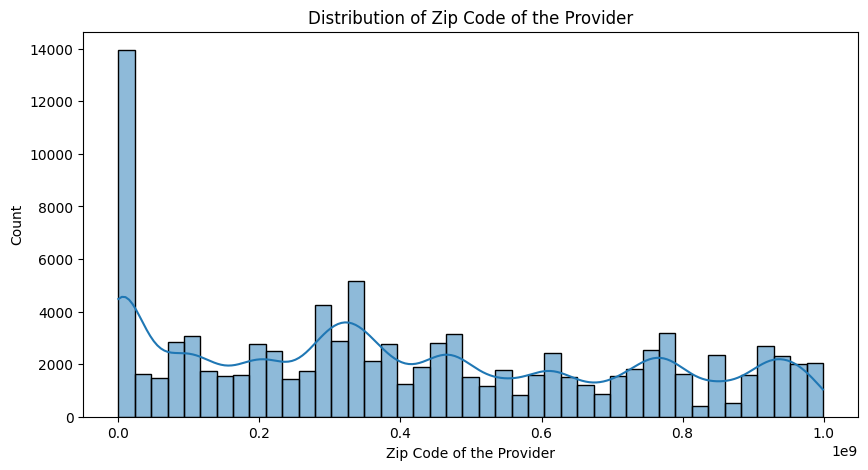

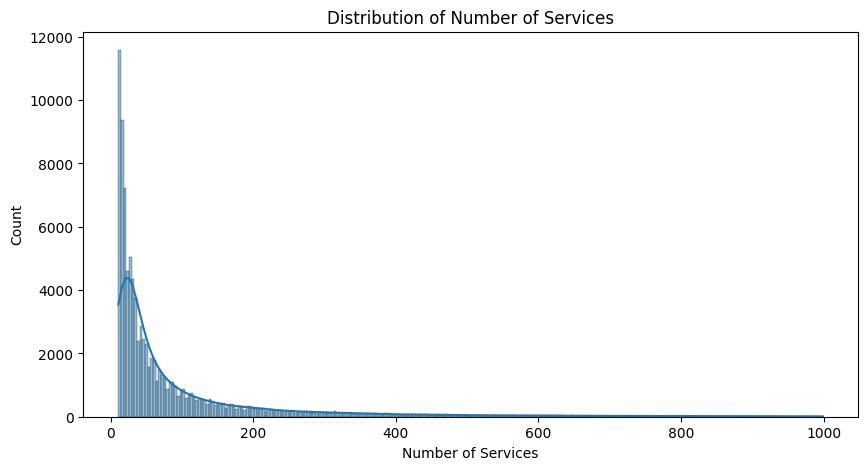

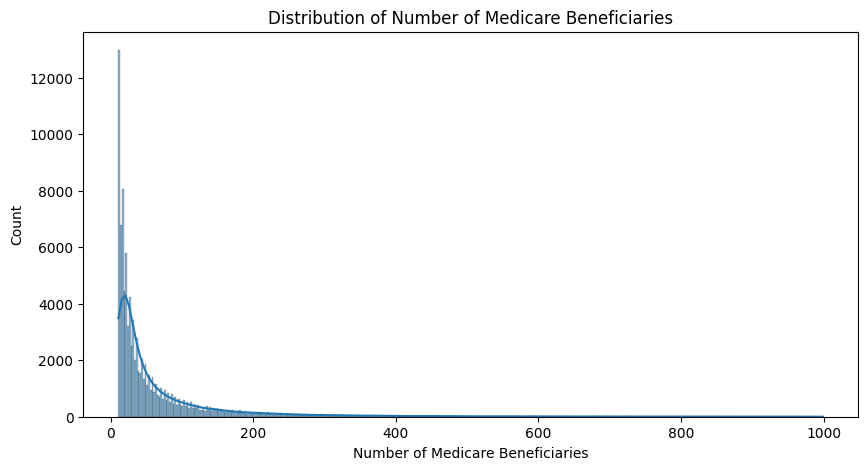

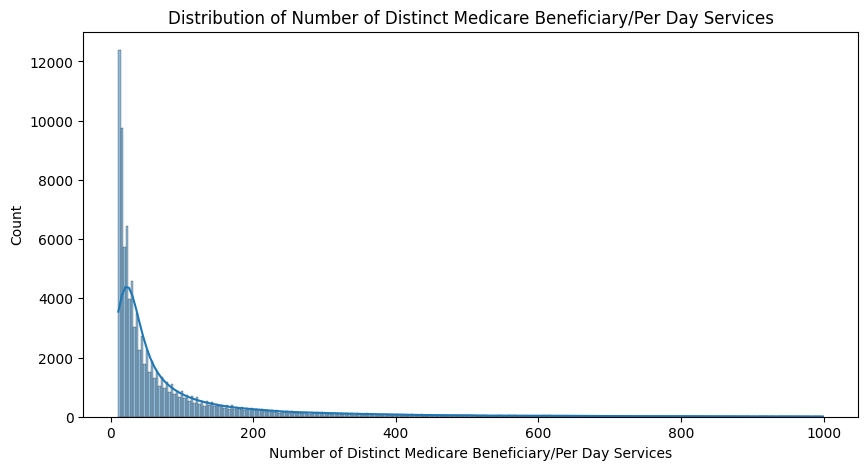

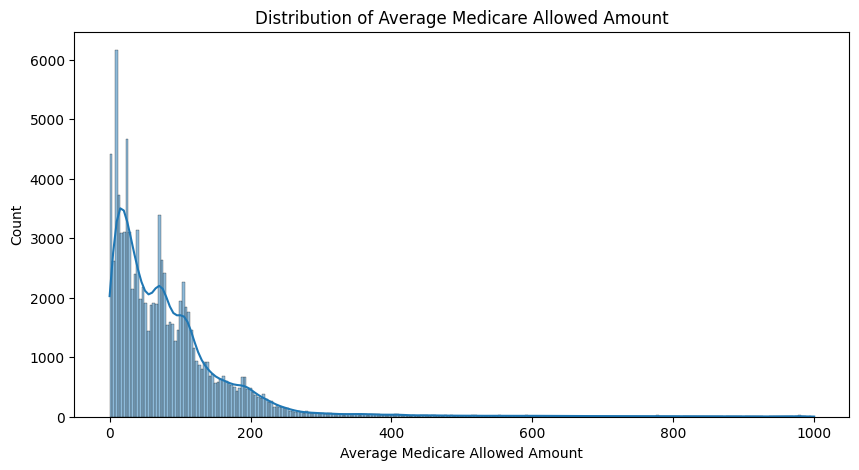

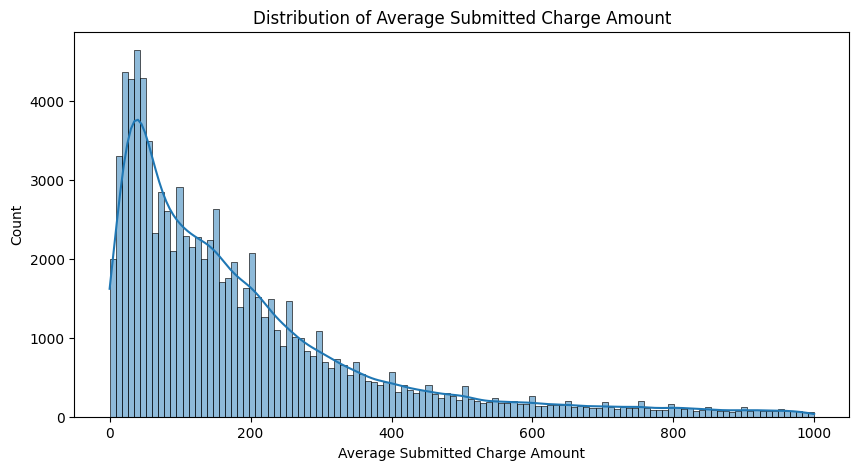

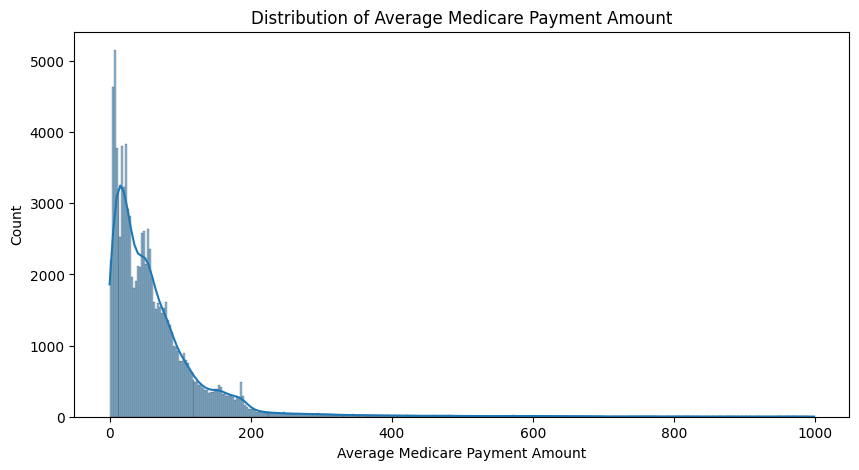

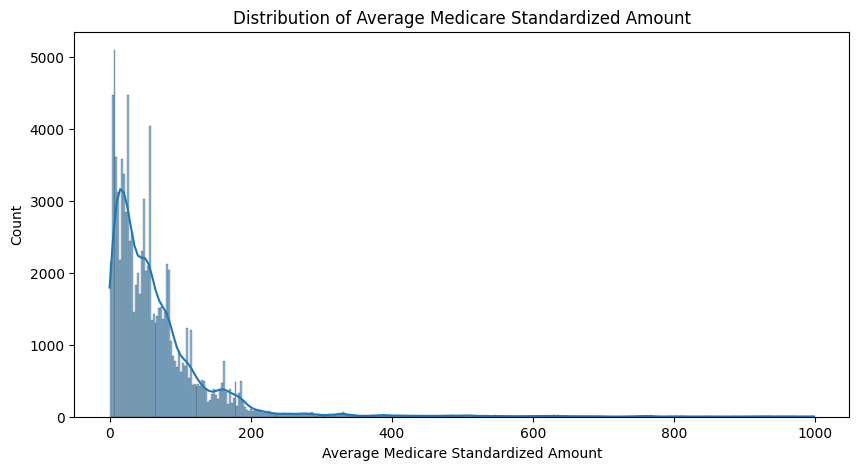

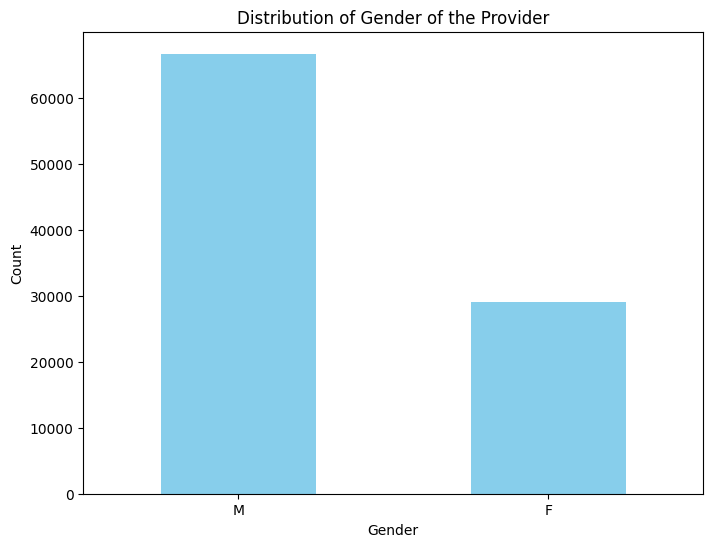

Medicare Participation Indicator
Y    99969
N       31
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize distribution of key numerical variables
for col in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()
# Plot the distribution of gender of the provider
plt.figure(figsize=(8, 6))
data['Gender of the Provider'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Gender of the Provider')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

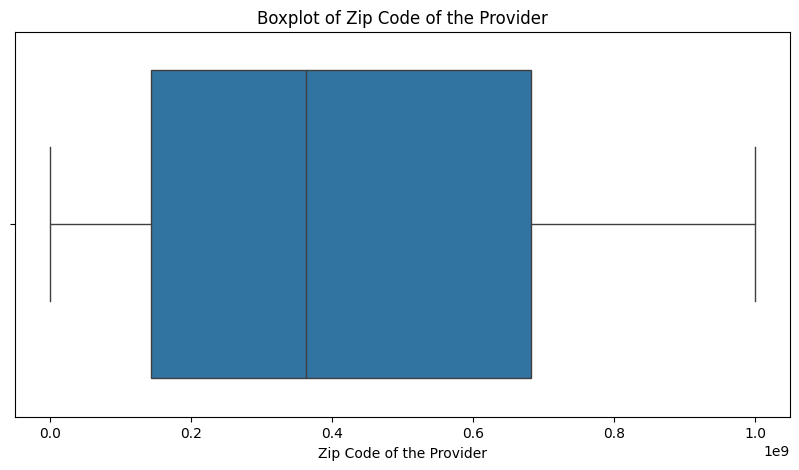

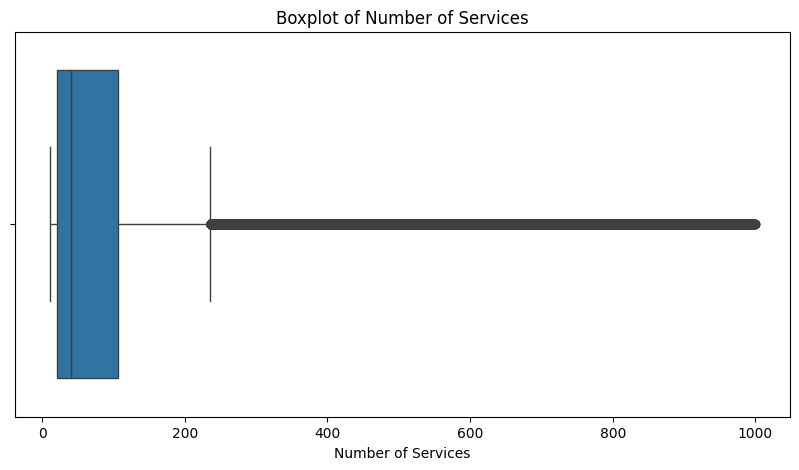

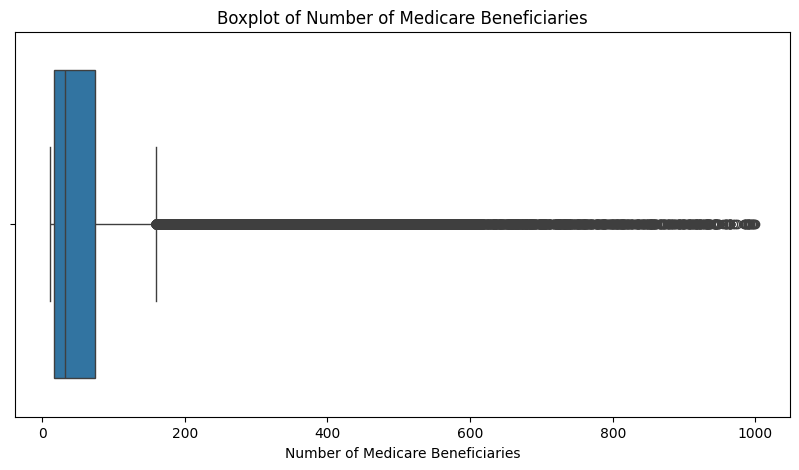

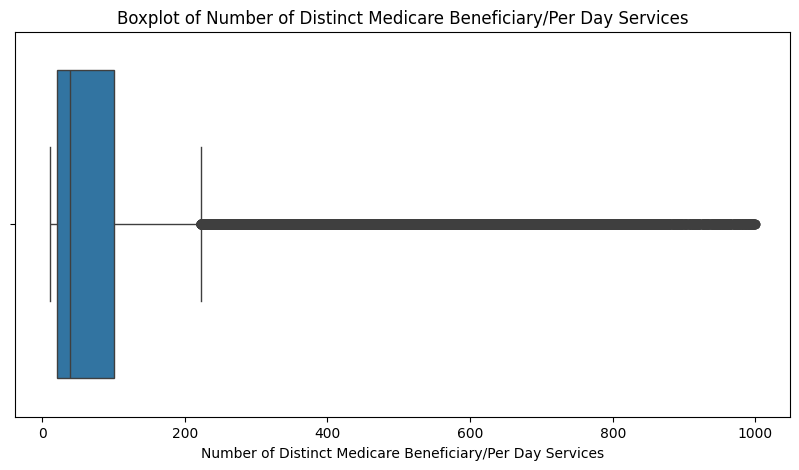

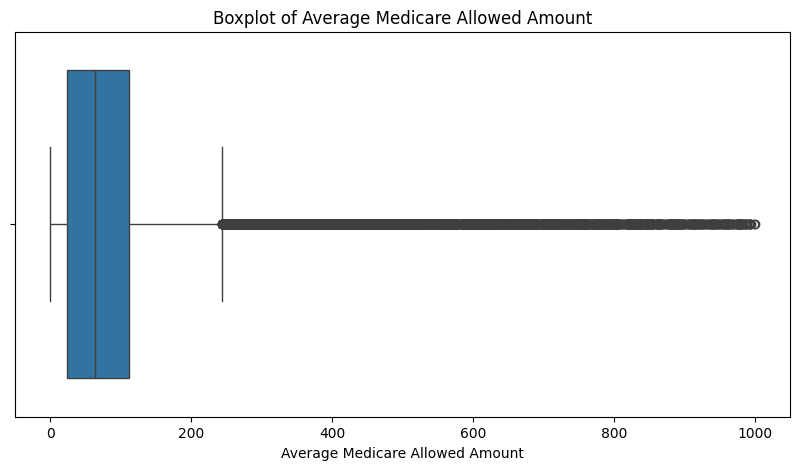

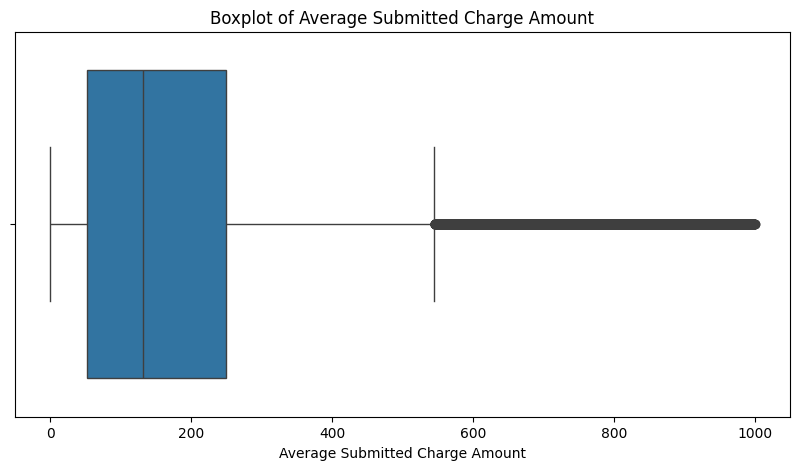

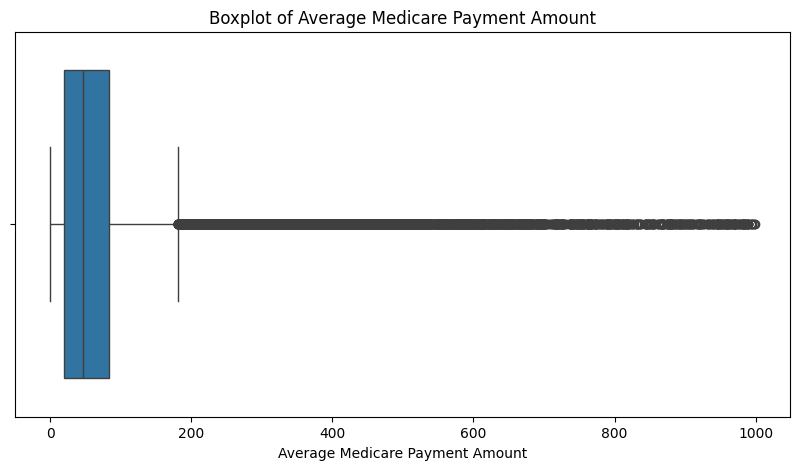

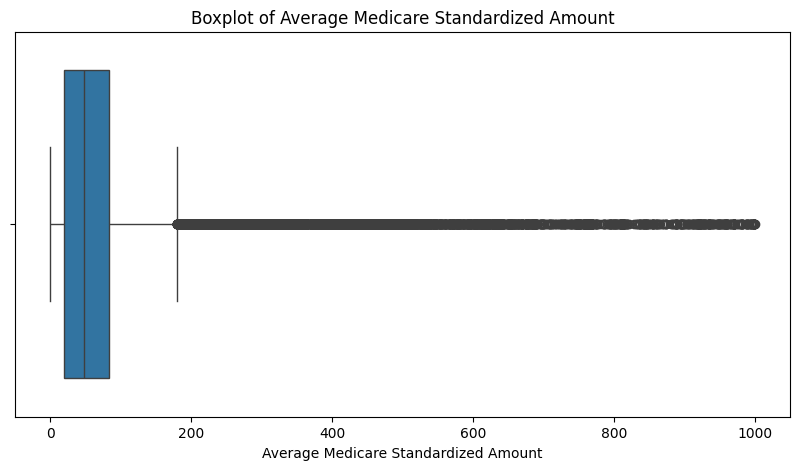

In [ ]:
# Boxplot for outlier detection
for col in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

<ipython-input-8-0d68ea09181e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.index, y=top_states.values, palette='viridis')


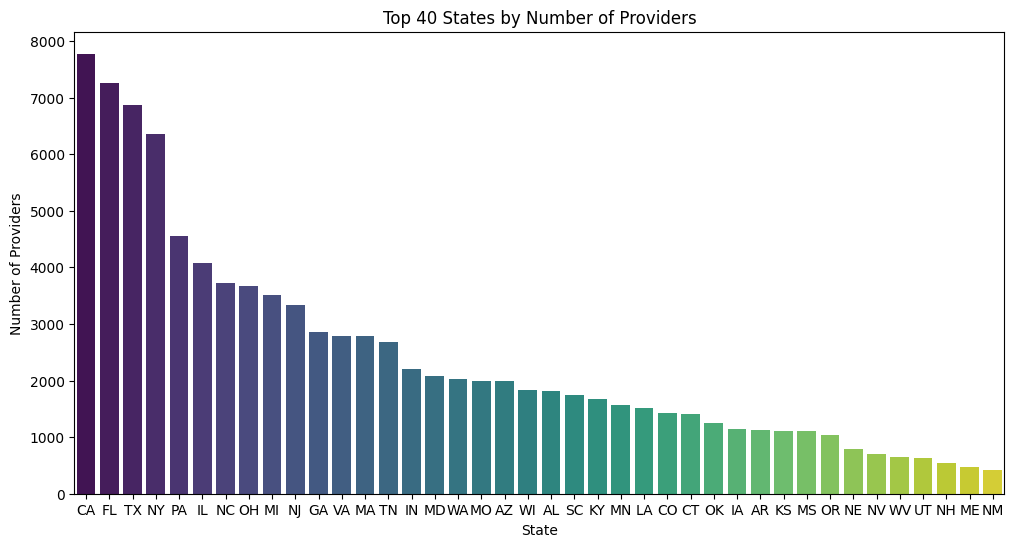

In [ ]:
plt.figure(figsize=(12, 6))
top_states = data['State Code of the Provider'].value_counts().head(40)
sns.barplot(x=top_states.index, y=top_states.values, palette='viridis')
plt.title('Top 40 States by Number of Providers')
plt.xlabel('State')
plt.ylabel('Number of Providers')
plt.show()

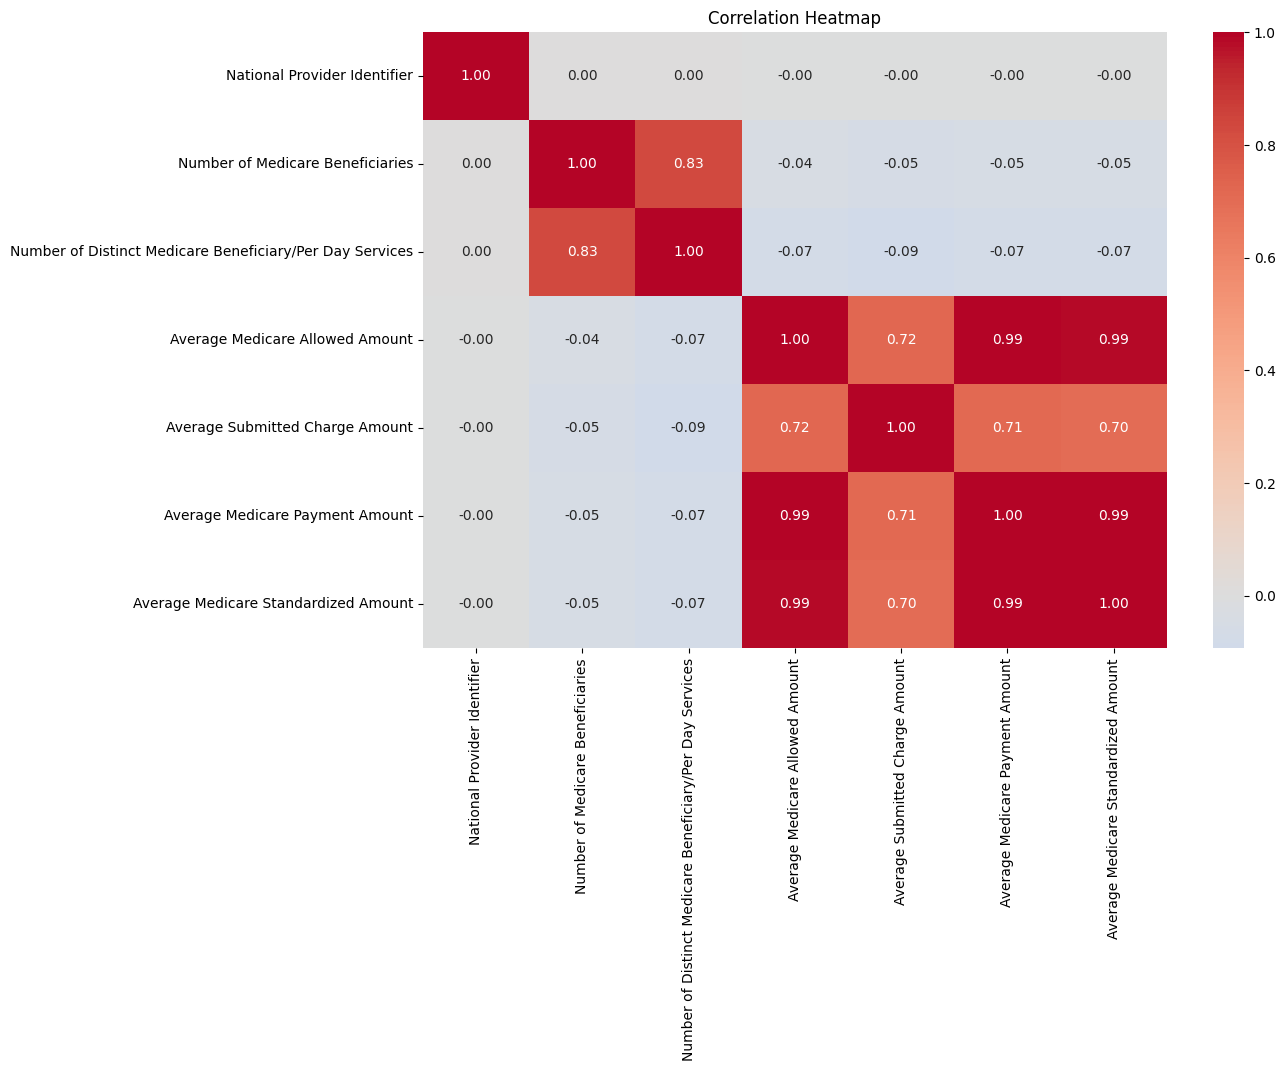

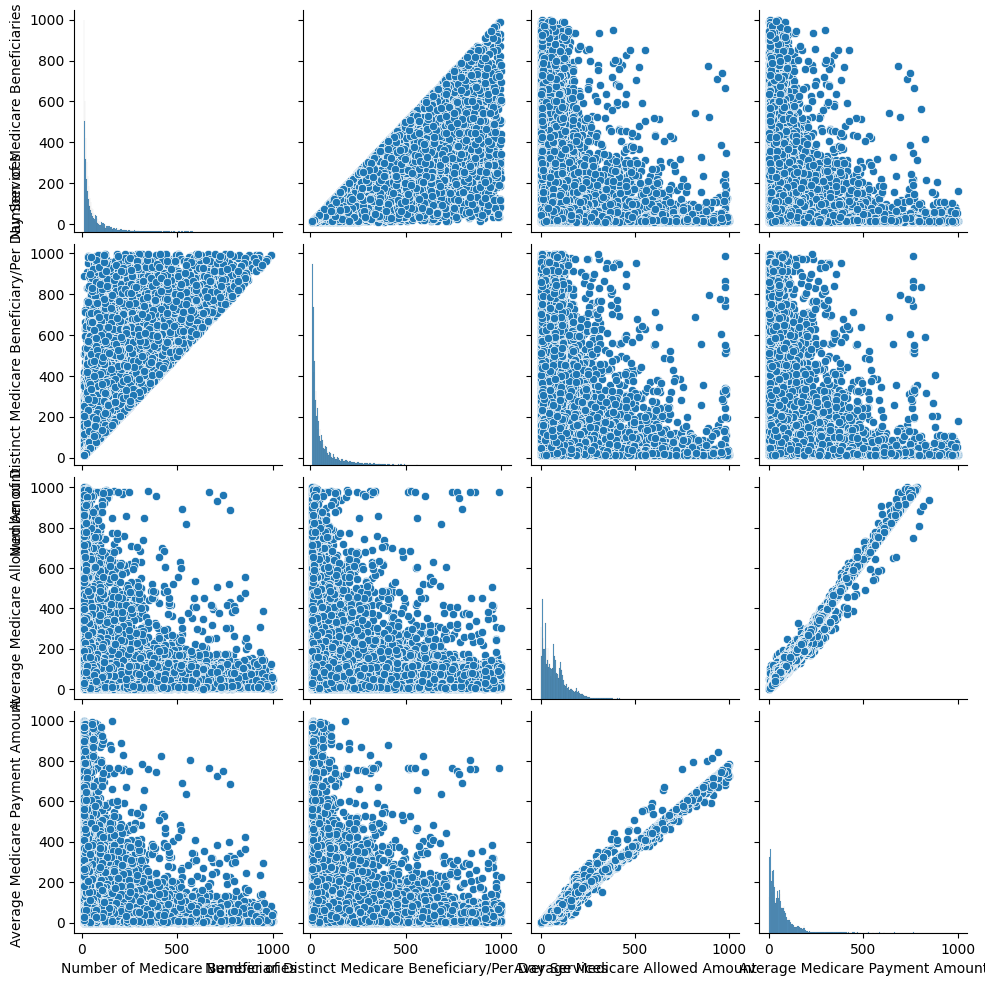

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
columns_to_keep = ['National Provider Identifier', 'Number of Medicare Beneficiaries', 'Number of Distinct Medicare Beneficiary/Per Day Services', 'Average Medicare Allowed Amount', 'Average Submitted Charge Amount', 'Average Medicare Payment Amount', 'Average Medicare Standardized Amount']
new_data = data[columns_to_keep]
new_data=new_data.apply(pd.to_numeric, errors='coerce')
correlation_matrix = new_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()
# Specify the columns you want in the pair plot
columns_for_pairplot = ['Number of Medicare Beneficiaries','Number of Distinct Medicare Beneficiary/Per Day Services', 'Average Medicare Allowed Amount', 'Average Medicare Payment Amount']

# Create a pair plot using the selected columns
sns.pairplot(new_data[columns_for_pairplot])
plt.show()




